# Worksheet 24

Name: Kian Boon Tan

UID: U93983891 

### Topics

- Advanced Neural Networks

## Advanced Neural Networks

Nothing to do in this worksheet except follow along in lecture / use this code to better understand Neural Networks.

## Auto Encoder Example

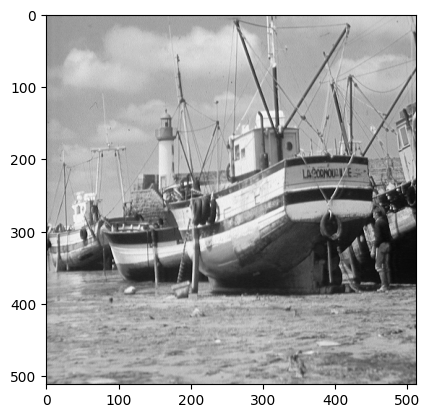

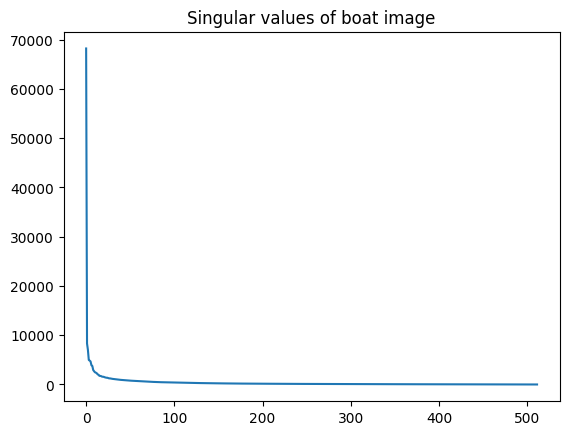

Epoch 1/500
11/11 [==============================] - 1s 4ms/step - loss: 19947.8086
Epoch 2/500
11/11 [==============================] - 0s 4ms/step - loss: 12322.4131
Epoch 3/500
11/11 [==============================] - 0s 4ms/step - loss: 7678.4595
Epoch 4/500
11/11 [==============================] - 0s 3ms/step - loss: 6284.3276
Epoch 5/500
11/11 [==============================] - 0s 3ms/step - loss: 5981.5610
Epoch 6/500
11/11 [==============================] - 0s 4ms/step - loss: 5897.4048
Epoch 7/500
11/11 [==============================] - 0s 3ms/step - loss: 5881.0796
Epoch 8/500
11/11 [==============================] - 0s 4ms/step - loss: 5843.9507
Epoch 9/500
11/11 [==============================] - 0s 4ms/step - loss: 5829.0483
Epoch 10/500
11/11 [==============================] - 0s 4ms/step - loss: 5808.8599
Epoch 11/500
11/11 [==============================] - 0s 3ms/step - loss: 5749.3608
Epoch 12/500
11/11 [==============================] - 0s 4ms/step - loss: 5824.6260

11/11 [==============================] - 0s 6ms/step - loss: 3704.5735
Epoch 195/500
11/11 [==============================] - 0s 6ms/step - loss: 3600.8838
Epoch 196/500
11/11 [==============================] - 0s 5ms/step - loss: 3707.1353
Epoch 197/500
11/11 [==============================] - 0s 6ms/step - loss: 3694.7620
Epoch 198/500
11/11 [==============================] - 0s 5ms/step - loss: 3579.6055
Epoch 199/500
11/11 [==============================] - 0s 5ms/step - loss: 3735.2395
Epoch 200/500
11/11 [==============================] - 0s 5ms/step - loss: 3684.2080
Epoch 201/500
11/11 [==============================] - 0s 5ms/step - loss: 3618.5405
Epoch 202/500
11/11 [==============================] - 0s 5ms/step - loss: 3704.9812
Epoch 203/500
11/11 [==============================] - 0s 5ms/step - loss: 3567.7332
Epoch 204/500
11/11 [==============================] - 0s 5ms/step - loss: 3670.9246
Epoch 205/500
11/11 [==============================] - 0s 6ms/step - loss: 3579

11/11 [==============================] - 0s 3ms/step - loss: 3393.5898
Epoch 387/500
11/11 [==============================] - 0s 4ms/step - loss: 3393.3677
Epoch 388/500
11/11 [==============================] - 0s 3ms/step - loss: 3338.3691
Epoch 389/500
11/11 [==============================] - 0s 3ms/step - loss: 3415.8757
Epoch 390/500
11/11 [==============================] - 0s 3ms/step - loss: 3325.1912
Epoch 391/500
11/11 [==============================] - 0s 3ms/step - loss: 3396.0056
Epoch 392/500
11/11 [==============================] - 0s 3ms/step - loss: 3292.7236
Epoch 393/500
11/11 [==============================] - 0s 3ms/step - loss: 3421.9072
Epoch 394/500
11/11 [==============================] - 0s 4ms/step - loss: 3309.9368
Epoch 395/500
11/11 [==============================] - 0s 3ms/step - loss: 3379.4497
Epoch 396/500
11/11 [==============================] - 0s 2ms/step - loss: 3353.0439
Epoch 397/500
11/11 [==============================] - 0s 3ms/step - loss: 3422

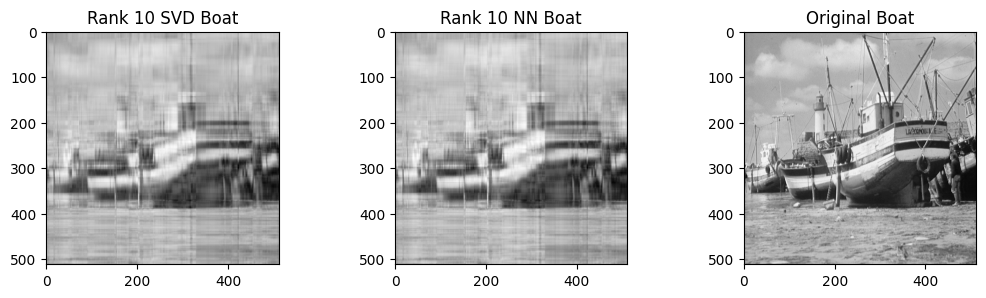

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from tensorflow import keras, norm
from tensorflow.keras import layers

# Principal Component Extraction using Neural Net
#
# 
#       x[0]            x[0]' 
#          \            /
#           \          /
#            \        /
#       x[1]  \      /  x[1]'
#            \ \    / /   
#         .    \\  //    .
#         .  --- z ---   .
#         .    //  \\    .
#            / /    \ \
#      x[n-1] /      \ x[n-1]' 
#            /        \
#           /          \
#       x[n]             x[n]'
#
# where x' is the approximation of x based on the z components extracted

# MODIFY THIS LINE
RANK = 10

def custom_loss(y_true, y_pred):
    return norm(y_true - y_pred, ord='euclidean')

def frobenius(X, Y):
    return np.linalg.norm(X - Y, ord='fro')

boat = np.loadtxt('./boat.dat')
plt.figure()
_ = plt.imshow(boat,cmap = cm.Greys_r)
plt.show()

u,s,vt=np.linalg.svd(boat,full_matrices=False)
_ = plt.plot(s)
plt.title('Singular values of boat image')
plt.show()

# construct a rank-RANK version of the boat
scopy = s.copy()
scopy[RANK:]=0
boatApprox = u.dot(np.diag(scopy)).dot(vt)

model = keras.models.Sequential()
model.add(layers.Dense(RANK, use_bias=False, input_dim=len(boat)))
model.add(layers.Dense(len(boat), use_bias=False))
model.compile(loss=custom_loss)

history = model.fit(boat, boat, batch_size=50, epochs=500)

boatNNApprox = model.predict(boat)

print("Frobenius Distance between boat and rank-"+str(RANK)+" approximation: ", frobenius(boat, boatApprox))
print("Frobenius Distance between boat and NN output with 1 hidden layer of "+str(RANK)+" neurons: ", frobenius(boat, boatNNApprox))

plt.figure(figsize=(12,9))
plt.subplot(1,3,1)
plt.imshow(boatApprox,cmap = cm.Greys_r)
plt.title('Rank ' + str(RANK) + ' SVD Boat')
plt.subplot(1,3,2)
plt.imshow(boatNNApprox,cmap = cm.Greys_r)
plt.title('Rank ' + str(RANK) + ' NN Boat')
plt.subplot(1,3,3)
plt.imshow(boat,cmap = cm.Greys_r)
plt.title('Original Boat')

_ = plt.subplots_adjust(wspace=0.5)
plt.show()

## CNN Example

170498071/170498071 [==============================] - 103s 1us/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


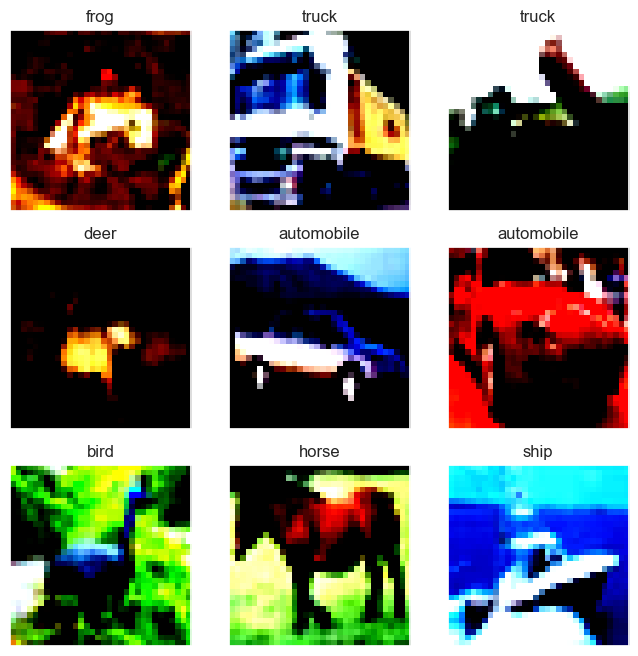

Epoch 1/10
50/50 [==============================] - 156s 3s/step - loss: 2.3555 - accuracy: 0.2379 - val_loss: 1.8499 - val_accuracy: 0.3185
Epoch 2/10
50/50 [==============================] - 147s 3s/step - loss: 1.7572 - accuracy: 0.3705 - val_loss: 1.5489 - val_accuracy: 0.4431
Epoch 3/10
50/50 [==============================] - 149s 3s/step - loss: 1.5293 - accuracy: 0.4566 - val_loss: 1.3657 - val_accuracy: 0.5168
Epoch 4/10
50/50 [==============================] - 153s 3s/step - loss: 1.3697 - accuracy: 0.5158 - val_loss: 1.4112 - val_accuracy: 0.4985
Epoch 5/10
50/50 [==============================] - 151s 3s/step - loss: 1.2411 - accuracy: 0.5625 - val_loss: 1.1638 - val_accuracy: 0.5862
Epoch 6/10
50/50 [==============================] - 146s 3s/step - loss: 1.1149 - accuracy: 0.6136 - val_loss: 1.0249 - val_accuracy: 0.6395
Epoch 7/10
50/50 [==============================] - 147s 3s/step - loss: 1.0207 - accuracy: 0.6432 - val_loss: 1.1687 - val_accuracy: 0.5860
Epoch 8/10
50

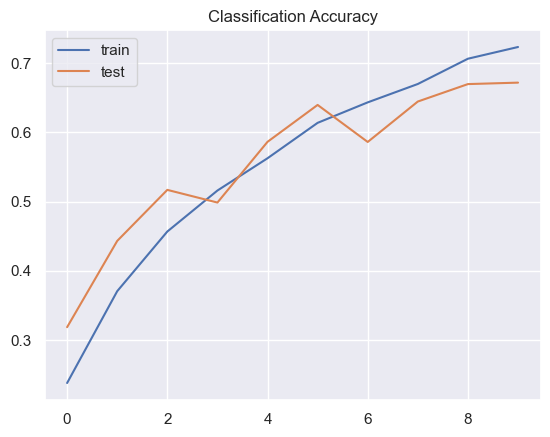

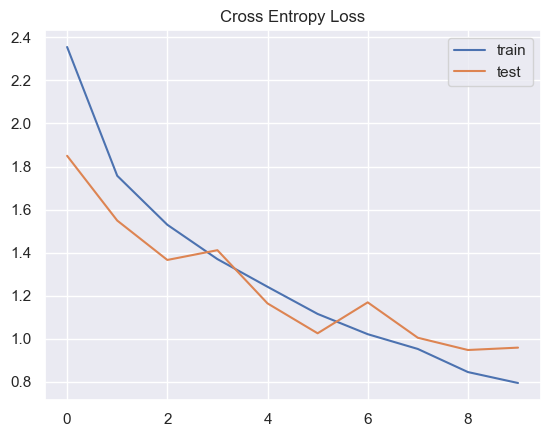

313/313 [==============================] - 7s 21ms/step


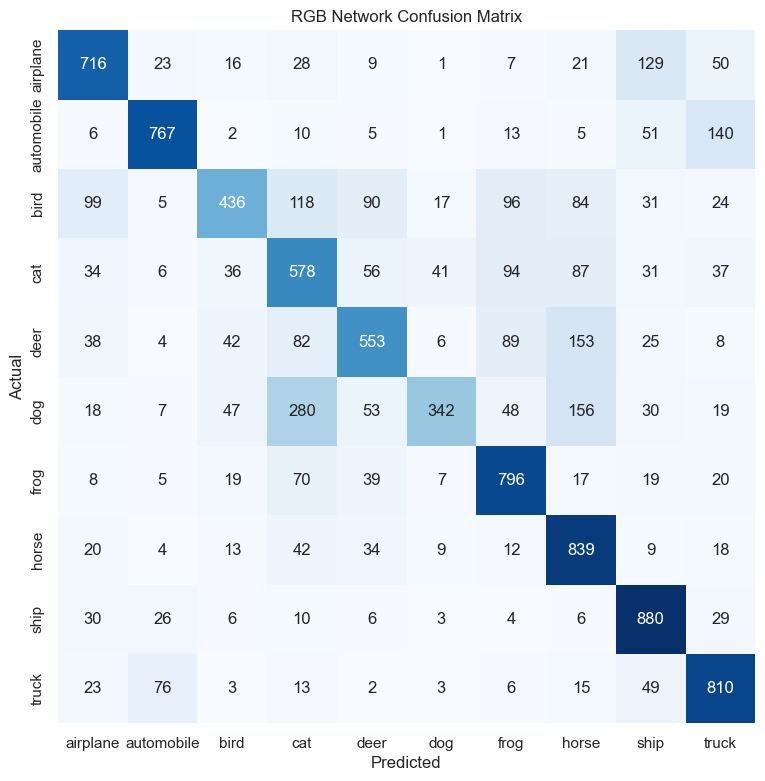

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras import utils
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
mean = np.mean(X_train, axis = (0,1,2))
std = np.std(X_train, axis = (0,1,2))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(8, 8))
index = 0
for i in range(3):
    for j in range(3):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, utils.to_categorical(y_train), epochs=10, batch_size=1000, validation_data=(X_test, utils.to_categorical(y_test)))

plt.plot(history.history["accuracy"], label='train')
plt.plot(history.history["val_accuracy"], label='test')
plt.title('Classification Accuracy')
plt.legend()
plt.show()

plt.plot(history.history["loss"], label='train')
plt.plot(history.history["val_loss"], label='test')
plt.title('Cross Entropy Loss')
plt.legend()
plt.show()


predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(predictions,axis=1))
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.title('RGB Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()